In [2]:
#imported all the libraries used

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

In [3]:
#path defined from which csv file is read
path="small_data.csv"
data = pd.read_csv(path)

path_cards="sd254_cards.csv"
data_cards = pd.read_csv(path_cards)

path_users="sd254_users.csv"
data_users = pd.read_csv(path_users)
#One-hot encoding for categorical feature 'Sex'
#data = pd.get_dummies(data, columns = ['Sex'])

#Displayed datatypes and null/non-null values
print("Info on transactions")
print(data.info())

print()
print("Info on cards")
print(data_cards.info())

print()
print("Info on users")
print(data_users.info())
#Displayed feature statistics
print()
print("Transactions Statistics")
display(data.describe())

print()
print("Cards Statistics")
display(data_cards.describe())

print()
print("User Statistics")
display(data_users.describe())


#Labeled all features and target
#data = data[['Sex_F', 'Sex_I', 'Sex_M', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']]

#Scaled data - mean = 0, var = 1
#scaler = StandardScaler()
#data[['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']] = scaler.fit_transform(data[['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']])

Info on transactions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273328 entries, 0 to 273327
Data columns (total 16 columns):
Unnamed: 0        273328 non-null int64
User              273328 non-null int64
Card              273328 non-null int64
Year              273328 non-null int64
Month             273328 non-null int64
Day               273328 non-null int64
Time              273328 non-null object
Amount            273328 non-null object
Use Chip          273328 non-null object
Merchant Name     273328 non-null int64
Merchant City     273328 non-null object
Merchant State    228151 non-null object
Zip               220082 non-null float64
MCC               273328 non-null int64
Errors?           5072 non-null object
Is Fraud?         273328 non-null object
dtypes: float64(1), int64(8), object(7)
memory usage: 33.4+ MB
None

Info on cards
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
User                     6146 n

,Unnamed: 0,User,Card,Year,Month,Day,Merchant Name,Zip,MCC
count,2.733280e+05,273328.000000,273328.000000,273328.000000,273328.000000,273328.000000,2.733280e+05,220082.000000,273328.000000
mean,1.222290e+07,1003.363318,1.375757,2011.963301,6.546673,15.702548,-4.155375e+17,50874.909329,5526.551224
std,7.027960e+06,568.436459,1.420734,5.054697,3.469510,8.815986,4.782507e+18,29421.721774,898.962999
min,4.310000e+02,0.000000,0.000000,1991.000000,1.000000,1.000000,-9.222899e+18,501.000000,1711.000000
25%,6.131172e+06,513.000000,0.000000,2008.000000,4.000000,8.000000,-4.500543e+18,28351.000000,5300.000000
50%,1.225985e+07,1010.000000,1.000000,2013.000000,7.000000,16.000000,-7.276121e+17,46562.000000,5499.000000
75%,1.831159e+07,1478.000000,2.000000,2016.000000,10.000000,23.000000,3.397453e+18,77564.000000,5812.000000
max,2.438689e+07,1999.000000,8.000000,2020.000000,12.000000,31.000000,9.222877e+18,99829.000000,9402.000000



Cards Statistics


,User,CARD INDEX,Card Number,CVV,Cards Issued,Year PIN last Changed
count,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000
mean,1003.477058,1.472502,4.820426e+15,506.220794,1.503091,2013.436707
std,571.724745,1.463294,1.328582e+15,289.431123,0.519191,4.270699
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,2002.000000
25%,508.250000,0.000000,4.486365e+15,257.000000,1.000000,2010.000000
50%,1004.000000,1.000000,5.108957e+15,516.500000,1.000000,2013.000000
75%,1493.750000,2.000000,5.585237e+15,756.000000,2.000000,2017.000000
max,1999.000000,8.000000,6.997197e+15,999.000000,3.000000,2020.000000



User Statistics


,Current Age,Retirement Age,Birth Year,Birth Month,Apartment,Zipcode,Latitude,Longitude,FICO Score,Num Credit Cards
count,2000.000000,2000.000000,2000.000000,2000.000000,528.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45.391500,66.237500,1973.803000,6.439000,693.547348,50535.412000,37.389225,-91.554765,709.734500,3.073000
std,18.414092,3.628867,18.421234,3.565338,1897.157861,29359.754742,5.114324,16.283293,67.221949,1.637379
min,18.000000,50.000000,1918.000000,1.000000,1.000000,1060.000000,20.880000,-159.410000,480.000000,1.000000
25%,30.000000,65.000000,1961.000000,3.000000,5.000000,28214.250000,33.837500,-97.395000,681.000000,2.000000
50%,44.000000,66.000000,1975.000000,7.000000,10.000000,46305.500000,38.250000,-86.440000,711.500000,3.000000
75%,58.000000,68.000000,1989.000000,10.000000,95.250000,77086.250000,41.200000,-80.130000,753.000000,4.000000
max,101.000000,79.000000,2002.000000,12.000000,9940.000000,99508.000000,61.200000,-68.670000,850.000000,9.000000


In [4]:
data

,Unnamed: 0,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,431,0,0,2003,3,10,20:24,$57.75,Swipe Transaction,-7091578704632084081,Fontanelle,IA,50846.0,5812,NaN,No
1,639,0,0,2003,8,18,07:05,$30.89,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,656,0,0,2003,9,5,20:10,$71.35,Swipe Transaction,-5023497618971072366,Mira Loma,CA,91752.0,5812,NaN,No
3,720,0,0,2003,12,15,20:16,$76.22,Swipe Transaction,-4500542936415012428,La Verne,CA,91750.0,5814,NaN,No
4,870,0,0,2004,6,15,06:22,$144.61,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273323,24386349,1999,1,2019,10,8,09:51,$182.00,Chip Transaction,1270471339275628505,Waianae,HI,96792.0,3730,NaN,No
273324,24386576,1999,1,2019,12,2,07:42,$26.94,Online Transaction,-6160036380778658394,ONLINE,NaN,NaN,4121,NaN,No
273325,24386697,1999,1,2019,12,24,11:50,$82.74,Chip Transaction,2058452562437950274,Russellville,AL,35653.0,7538,NaN,No
273326,24386863,1999,1,2020,2,21,15:06,$7.19,Chip Transaction,1641456720718814353,Merrimack,NH,3054.0,5411,NaN,No


In [5]:
data_cards

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1997,1,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No
6142,1997,2,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No
6143,1998,0,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No
6144,1999,0,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No


In [6]:
data_users

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jose Faraday,32,70,1987,7,Male,6577 Lexington Lane,9.0,Freeport,NY,11520,40.65,-73.58,$23550,$48010,$87837,703,3
1996,Ximena Richardson,62,65,1957,11,Female,2 Elm Drive,955.0,Independence,KY,41051,38.95,-84.54,$24218,$49378,$104480,740,4
1997,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3
1998,Juelz Roman,66,60,1954,2,Male,259 Valley Boulevard,NaN,Camp Hill,PA,17011,40.24,-76.92,$25336,$54654,$27241,618,1


In [7]:
print(data['Is Fraud?'].value_counts())
print()
print(data["Errors?"].value_counts())
print()

print(data_cards["Card Brand"].value_counts())
print()
print(data_cards["Card Type"].value_counts())
print()
print(data_cards["Card on Dark Web"].value_counts())

No     243571
Yes     29757
Name: Is Fraud?, dtype: int64

Insufficient Balance                     2767
Bad PIN                                   876
Technical Glitch                          544
Bad CVV                                   396
Bad Card Number                           223
Bad Expiration                            209
Bad Zipcode                                21
Bad PIN,Insufficient Balance               11
Bad CVV,Insufficient Balance                4
Insufficient Balance,Technical Glitch       4
Bad PIN,Technical Glitch                    4
Bad Expiration,Insufficient Balance         3
Bad Card Number,Insufficient Balance        3
Bad Expiration,Technical Glitch             3
Bad Expiration,Bad CVV                      2
Bad CVV,Technical Glitch                    2
Name: Errors?, dtype: int64

Mastercard    3209
Visa          2326
Amex           402
Discover       209
Name: Card Brand, dtype: int64

Debit              3511
Credit             2057
Debit (Prepaid)     

In [8]:
##Dropping features whihc do not contribute much
data = data.drop(['Unnamed: 0', 'Month', 'Day', 'Time', 'Merchant Name', 'Merchant City', 'Merchant State', 'Zip'], axis = 1)
data_cards = data_cards.drop(['Card Number', 'Expires', 'CVV', 'Has Chip', 'Cards Issued', 'Acct Open Date', 'Card on Dark Web'], axis = 1)
data_users = data_users.drop(['Person', 'Retirement Age', 'Birth Month', 'Birth Year',  'Address', 'Apartment', 'City', 'State','Zipcode' ,'Latitude', 'Longitude', 'Per Capita Income - Zipcode', 'Num Credit Cards'], axis=1)

In [9]:
data['Amount'] = data['Amount'].apply(lambda x: x[1:])
data['Amount'] = pd.to_numeric(data['Amount'])

data_cards['Credit Limit'] = data_cards['Credit Limit'].apply(lambda x: x[1:])
data_cards['Credit Limit'] = pd.to_numeric(data_cards['Credit Limit'])

data_users['Yearly Income - Person'] = data_users['Yearly Income - Person'].apply(lambda x: x[1:])
data_users['Yearly Income - Person'] = pd.to_numeric(data_users['Yearly Income - Person'])
data_users['Total Debt'] = data_users['Total Debt'].apply(lambda x: x[1:])
data_users['Total Debt'] = pd.to_numeric(data_users['Total Debt'])

In [10]:

#Label encoding string values
encoder = LabelEncoder()

data = data.fillna('')
data['Errors?']= encoder.fit_transform(data['Errors?'])
data['Use Chip']= encoder.fit_transform(data['Use Chip'])
data['Is Fraud?']= encoder.fit_transform(data['Is Fraud?'])
# Filling NaN values
data_cards = data_cards.fillna('')
data_cards['Card Brand']= encoder.fit_transform(data_cards['Card Brand'])
data_cards['Card Type']= encoder.fit_transform(data_cards['Card Type'])

data_users = data_users.fillna('')
data_users['Gender']= encoder.fit_transform(data_users['Gender'])

In [11]:
data_users['User'] = data_users.index

In [12]:
data = data.join(data_cards.set_index(['User', 'CARD INDEX']), on=['User', 'Card'])
data = data.join(data_users.set_index('User'), on='User')
data

,User,Card,Year,Amount,Use Chip,MCC,Errors?,Is Fraud?,Card Brand,Card Type,Credit Limit,Year PIN last Changed,Current Age,Gender,Yearly Income - Person,Total Debt,FICO Score
0,0,0,2003,57.75,2,5812,0,0,3,1,24295,2008,53,0,59696,127613,787
1,0,0,2003,30.89,2,5411,0,0,3,1,24295,2008,53,0,59696,127613,787
2,0,0,2003,71.35,2,5812,0,0,3,1,24295,2008,53,0,59696,127613,787
3,0,0,2003,76.22,2,5814,0,0,3,1,24295,2008,53,0,59696,127613,787
4,0,0,2004,144.61,2,5411,0,0,3,1,24295,2008,53,0,59696,127613,787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273323,1999,1,2019,182.00,0,3730,0,0,3,0,14400,2017,21,0,65909,181261,673
273324,1999,1,2019,26.94,1,4121,0,0,3,0,14400,2017,21,0,65909,181261,673
273325,1999,1,2019,82.74,0,7538,0,0,3,0,14400,2017,21,0,65909,181261,673
273326,1999,1,2020,7.19,0,5411,0,0,3,0,14400,2017,21,0,65909,181261,673


In [13]:
data = data.sample(frac=1).reset_index(drop=True)

In [14]:
data

,User,Card,Year,Amount,Use Chip,MCC,Errors?,Is Fraud?,Card Brand,Card Type,Credit Limit,Year PIN last Changed,Current Age,Gender,Yearly Income - Person,Total Debt,FICO Score
0,780,3,2016,71.00,0,5499,0,0,2,1,39606,2008,54,1,53986,58381,748
1,580,1,2014,9.96,2,5411,0,0,3,0,11400,2009,67,0,34954,5942,729
2,1919,2,2009,66.26,2,5541,14,0,0,0,6100,2019,56,1,26510,53023,696
3,777,5,1998,75.00,2,5499,0,0,3,1,3134,2011,72,1,65055,1676,736
4,1227,3,2012,-72.00,2,5499,0,0,2,1,4130,2015,44,0,84365,113529,796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273323,1191,1,2014,21.37,2,5813,0,0,0,0,6800,2002,47,1,36319,44737,730
273324,1791,3,2003,-80.00,2,5499,0,0,2,1,8021,2018,61,1,21397,54771,812
273325,610,2,2012,3.01,2,5541,0,0,2,1,12708,2008,53,1,31369,0,707
273326,1888,0,2002,119.28,1,4900,0,0,2,1,25422,2008,51,1,109673,242379,505


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

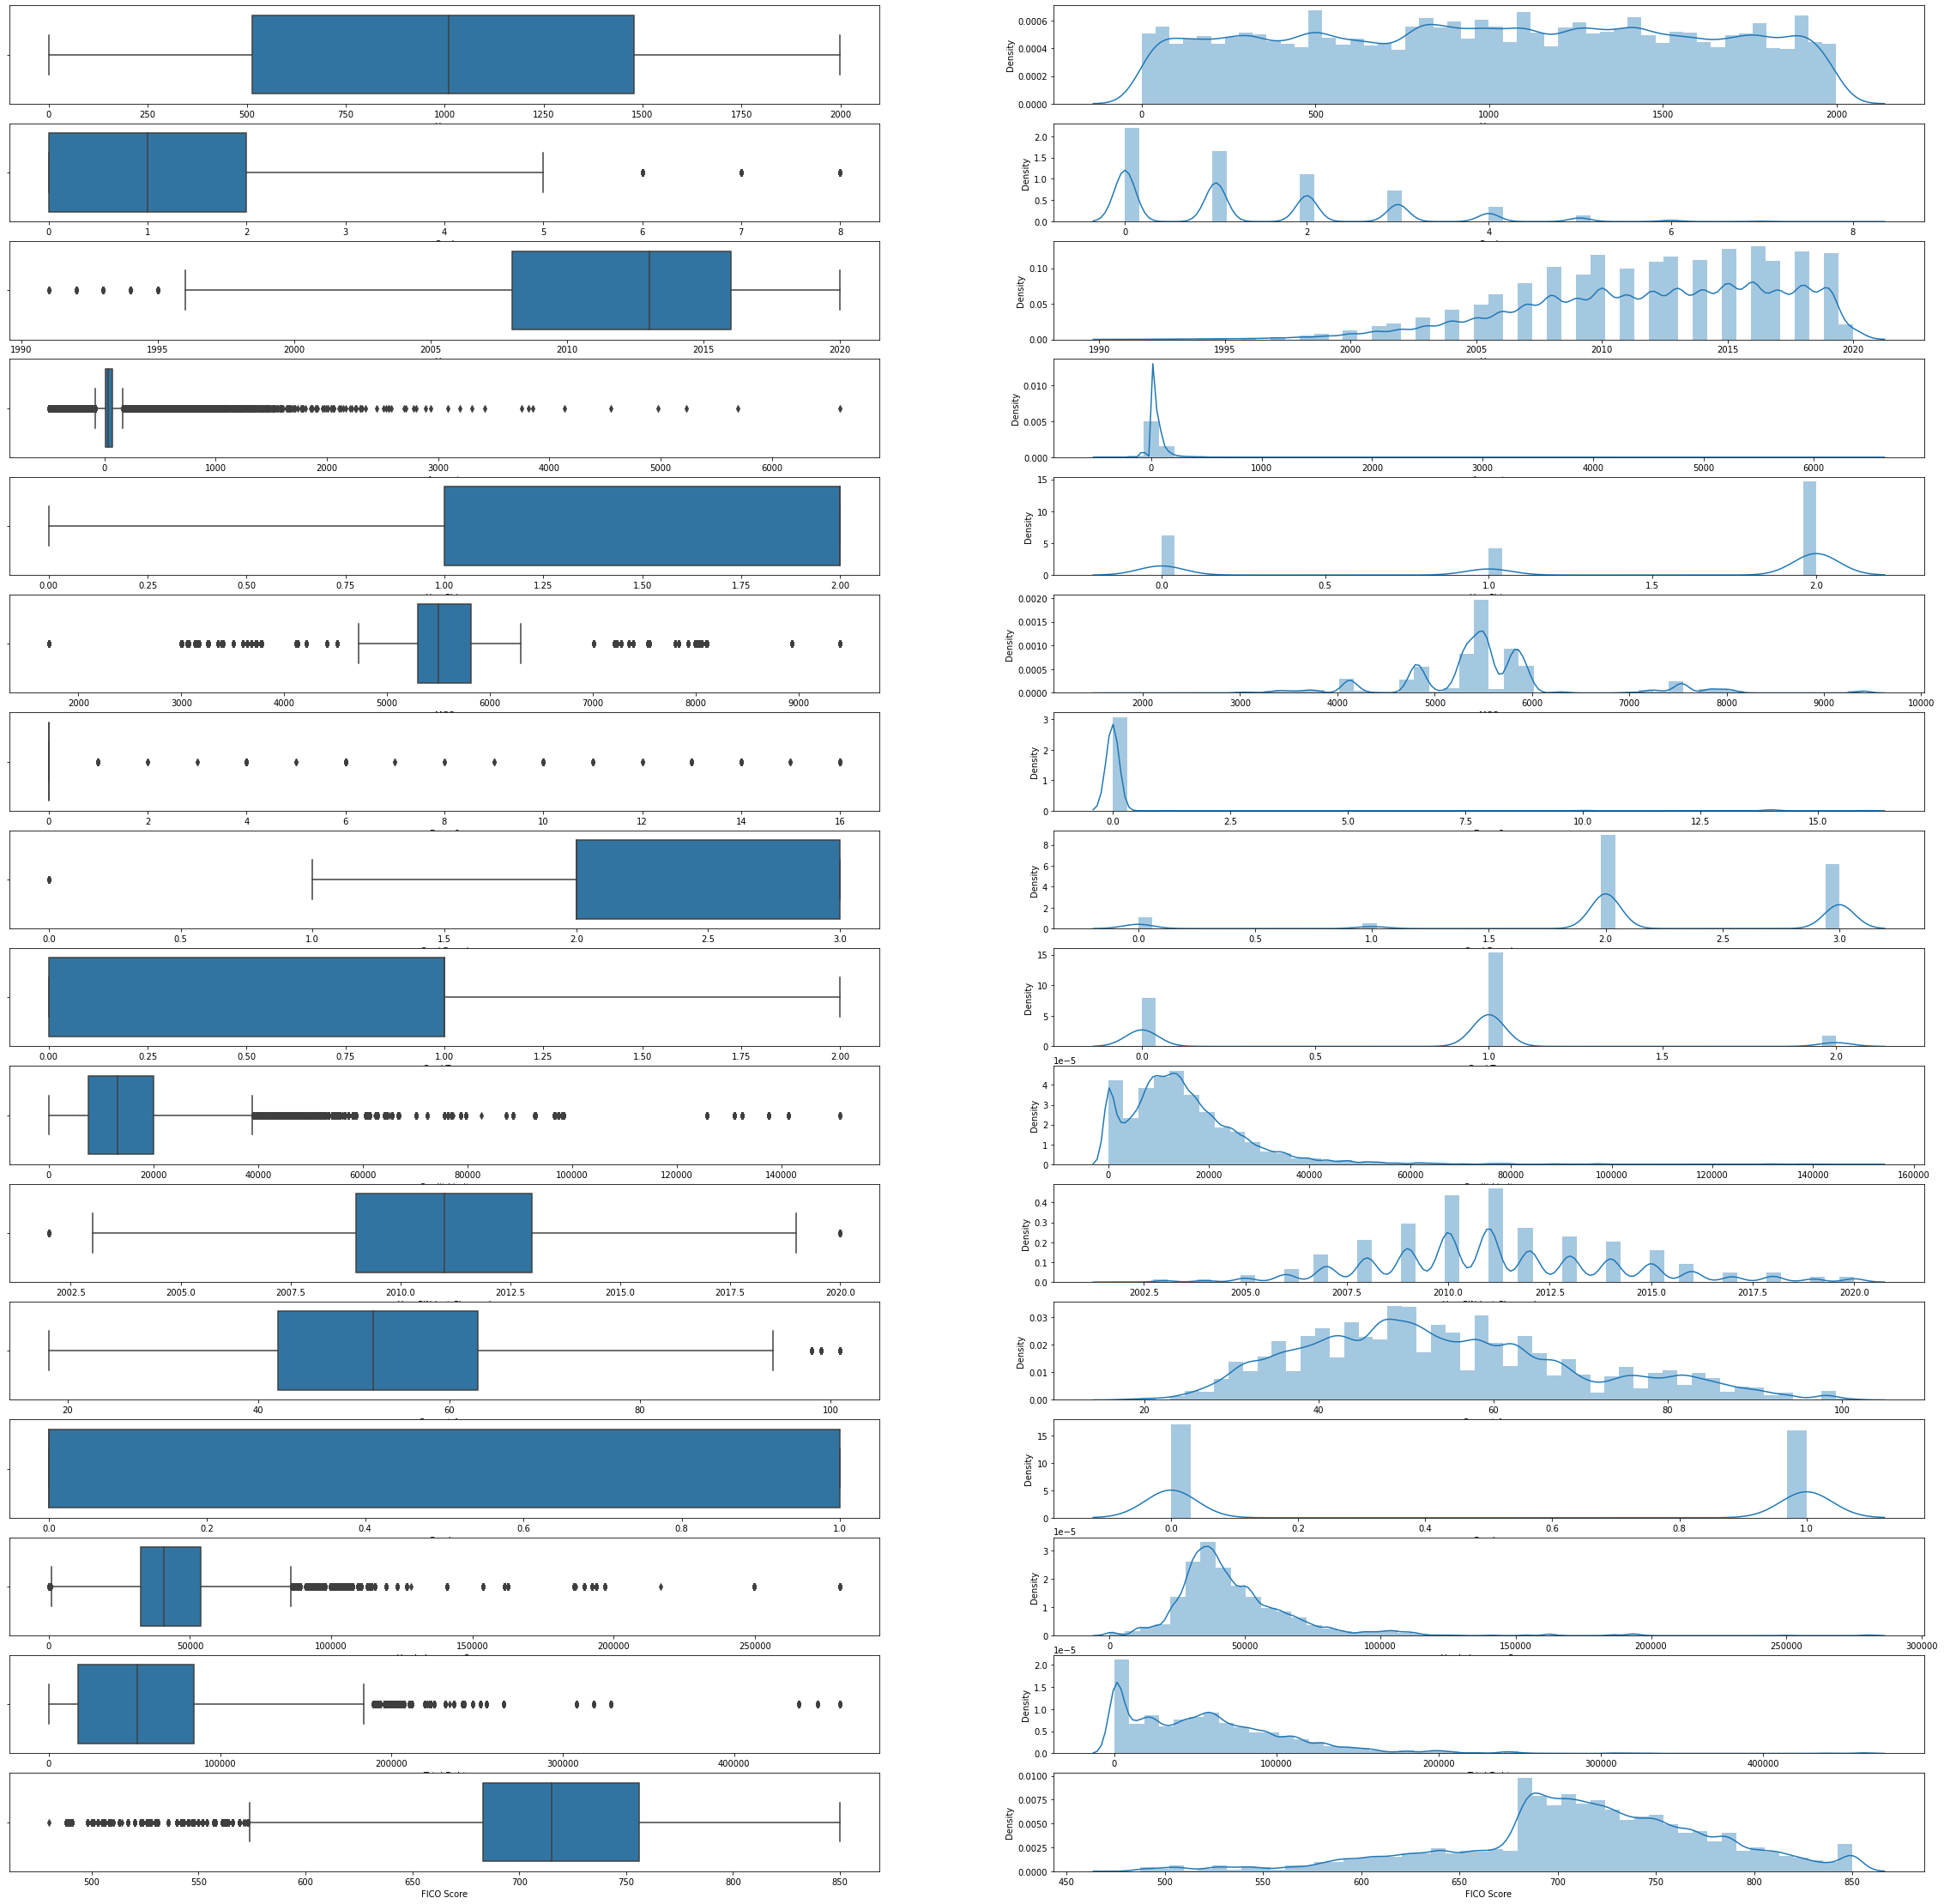

In [15]:
#Box plots and distribution curves of all features

fig, ax = plt.subplots(16, 2, figsize = (40, 40))
sns.boxplot(x= data["User"], ax = ax[0,0])
sns.distplot(data['User'], ax = ax[0,1])
sns.boxplot(x= data["Card"], ax = ax[1,0])
sns.distplot(data['Card'], ax = ax[1,1])
sns.boxplot(x= data["Year"], ax = ax[2,0])
sns.distplot(data['Year'], ax = ax[2,1])
sns.boxplot(x= data["Amount"], ax = ax[3,0])
sns.distplot(data['Amount'], ax = ax[3,1])
sns.boxplot(x= data["Use Chip"], ax = ax[4,0])
sns.distplot(data['Use Chip'], ax = ax[4,1])
sns.boxplot(x= data["MCC"], ax = ax[5,0])
sns.distplot(data['MCC'], ax = ax[5,1])
sns.boxplot(x= data["Errors?"], ax = ax[6,0])
sns.distplot(data['Errors?'], ax = ax[6,1])
sns.boxplot(x= data["Card Brand"], ax = ax[7,0])
sns.distplot(data['Card Brand'], ax = ax[7,1])
sns.boxplot(x= data["Card Type"], ax = ax[8,0])
sns.distplot(data['Card Type'], ax = ax[8,1])
sns.boxplot(x= data["Credit Limit"], ax = ax[9,0])
sns.distplot(data['Credit Limit'], ax = ax[9,1])
sns.boxplot(x= data["Year PIN last Changed"], ax = ax[10,0])
sns.distplot(data['Year PIN last Changed'], ax = ax[10,1])
sns.boxplot(x= data["Current Age"], ax = ax[11,0])
sns.distplot(data['Current Age'], ax = ax[11,1])
sns.boxplot(x= data["Gender"], ax = ax[12,0])
sns.distplot(data['Gender'], ax = ax[12,1])
sns.boxplot(x= data["Yearly Income - Person"], ax = ax[13,0])
sns.distplot(data['Yearly Income - Person'], ax = ax[13,1])
sns.boxplot(x= data["Total Debt"], ax = ax[14,0])
sns.distplot(data['Total Debt'], ax = ax[14,1])
sns.boxplot(x= data["FICO Score"], ax = ax[15,0])
sns.distplot(data['FICO Score'], ax = ax[15,1])

plt.savefig('save_as_a_png.png')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Is Fraud?', ylabel='Density'>

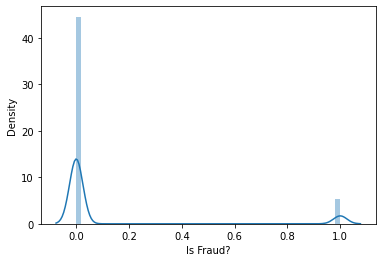

In [16]:
#Distribution curves of target

sns.distplot(data['Is Fraud?'])

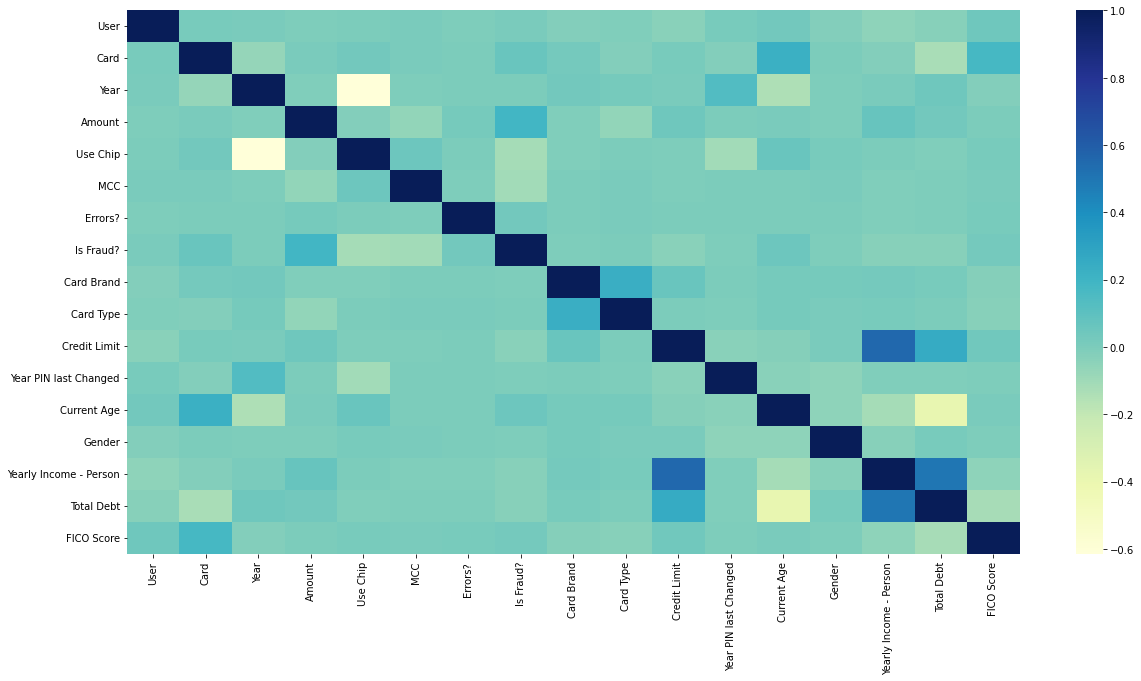

In [17]:
#Heat map of features
fig= plt.figure(figsize = (20, 10))
corr = data.corr()
dataplot = sb.heatmap(corr, cmap="YlGnBu")
data = data.iloc[:,:]
plt.savefig('heat.png')

In [18]:
data = data[['User', 'Card', 'Year',	'Amount',	'Use Chip',	'MCC',	'Errors?',	'Card Brand',	'Card Type',	'Credit Limit',	'Year PIN last Changed',	'Current Age',	'Gender',	'Yearly Income - Person',	'Total Debt',	'FICO Score', 	'Is Fraud?']]
data

,User,Card,Year,Amount,Use Chip,MCC,Errors?,Card Brand,Card Type,Credit Limit,Year PIN last Changed,Current Age,Gender,Yearly Income - Person,Total Debt,FICO Score,Is Fraud?
0,780,3,2016,71.00,0,5499,0,2,1,39606,2008,54,1,53986,58381,748,0
1,580,1,2014,9.96,2,5411,0,3,0,11400,2009,67,0,34954,5942,729,0
2,1919,2,2009,66.26,2,5541,14,0,0,6100,2019,56,1,26510,53023,696,0
3,777,5,1998,75.00,2,5499,0,3,1,3134,2011,72,1,65055,1676,736,0
4,1227,3,2012,-72.00,2,5499,0,2,1,4130,2015,44,0,84365,113529,796,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273323,1191,1,2014,21.37,2,5813,0,0,0,6800,2002,47,1,36319,44737,730,0
273324,1791,3,2003,-80.00,2,5499,0,2,1,8021,2018,61,1,21397,54771,812,0
273325,610,2,2012,3.01,2,5541,0,2,1,12708,2008,53,1,31369,0,707,0
273326,1888,0,2002,119.28,1,4900,0,2,1,25422,2008,51,1,109673,242379,505,0


In [19]:
#Splitting the dataset to train and test
np_data = np.array(data)
X = np_data
Y = np_data
X = X[:,0: (X.shape[1] - 1)]
Y = Y[:, X.shape[1]]

X = np.c_[np.ones(X.shape[0]), X]

X_train = X[0: int(0.8*X.shape[0]), :]
X_test = X[int(0.8*X.shape[0]):, :]
Y = Y.reshape(Y.shape[0], 1)
Y_train = Y[0:int(0.8*Y.shape[0]), :]
Y_test = Y[int(0.8*Y.shape[0]):, :]

# **First cell below** - 
Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

# **Second cell below** - 
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
where min, max = feature_range.

# **Third cell below** - 
Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

In [20]:
#Standrard scaling
np_data = np.array(data)
X_mm = np_data
Y_mm = np_data
X_mm = X_mm[:,0: (X_mm.shape[1] - 1)]
Y_mm = Y_mm[:, X_mm.shape[1]]

scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X_mm)

X_mm = np.c_[np.ones(X_mm.shape[0]), X_mm]

X_train_mm = X_mm[0: int(0.8*X_mm.shape[0]), :]
X_test_mm = X_mm[int(0.8*X_mm.shape[0]):, :]
Y_mm = Y_mm.reshape(Y_mm.shape[0], 1)
Y_train_mm = Y_mm[0:int(0.8*Y_mm.shape[0]), :]
Y_test_mm = Y_mm[int(0.8*Y_mm.shape[0]):, :]

In [21]:
#Min-Max Scaling
np_data = np.array(data)
X_ss = np_data
Y_ss = np_data
X_ss = X_ss[:,0: (X_ss.shape[1] - 1)]
Y_ss = Y_ss[:, X_ss.shape[1]]

scaler = StandardScaler()
X_ss = scaler.fit_transform(X_ss)

X_ss = np.c_[np.ones(X_ss.shape[0]), X_ss]

X_train_ss = X_ss[0: int(0.8*X_ss.shape[0]), :]
X_test_ss = X_ss[int(0.8*X_ss.shape[0]):, :]
Y_ss = Y_ss.reshape(Y_ss.shape[0], 1)
Y_train_ss = Y_ss[0:int(0.8*Y_ss.shape[0]), :]
Y_test_ss = Y_ss[int(0.8*Y_ss.shape[0]):, :]

In [22]:
#Robust Scaling
np_data = np.array(data)
X_r = np_data
Y_r= np_data
X_r = X_r[:,0: (X_r.shape[1] - 1)]
Y_r = Y_r[:, X_r.shape[1]]

scaler = RobustScaler()
X_r = scaler.fit_transform(X_r)

X_r = np.c_[np.ones(X_r.shape[0]), X_r]

X_train_r = X_r[0: int(0.8*X_r.shape[0]), :]
X_test_r = X_r[int(0.8*X_r.shape[0]):, :]
Y_r = Y_r.reshape(Y_r.shape[0], 1)
Y_train_r = Y_r[0:int(0.8*Y_r.shape[0]), :]
Y_test_r = Y_r[int(0.8*Y_r.shape[0]):, :]

## Decision Trees

In [23]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt_=dt.fit(X_train,Y_train) #Raw Data
dt_mm=dt.fit(X_train_mm,Y_train_mm) #Min-max Scaled data
dt_ss=dt.fit(X_train_ss,Y_train_ss)#Data with Standard scaling
dt_r=dt.fit(X_train_r,Y_train_r)#Data with Robust scaling

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy Score For training - ")
print(accuracy_score(Y_train,dt_.predict(X_train)),"Raw Data")
print(accuracy_score(Y_train_mm,dt_mm.predict(X_train_mm)),"Min Max")
print(accuracy_score(Y_train_ss,dt_ss.predict(X_train_ss)),"Standard Scaling")
print(accuracy_score(Y_train_r,dt_r.predict(X_train_r)), "Robust Scaling")
print()
print("Accuracy Score For testing - ")
print(accuracy_score(Y_test,dt_.predict(X_test)),"Raw Data")
print(accuracy_score(Y_test_mm,dt_mm.predict(X_test_mm)),"Min Max")
print(accuracy_score(Y_test_ss,dt_ss.predict(X_test_ss)),"Standard Scaling")
print(accuracy_score(Y_test_r,dt_r.predict(X_test_r)), "Robust Scaling")
print()
print("Precision Score For training - ")
print(precision_score(Y_train,dt_.predict(X_train)),"Raw Data")
print(precision_score(Y_train_mm,dt_mm.predict(X_train_mm)),"Min Max")
print(precision_score(Y_train_ss,dt_ss.predict(X_train_ss)),"Standard Scaling")
print(precision_score(Y_train_r,dt_r.predict(X_train_r)), "Robust Scaling")
print()
print("Precision Score For testing - ")
print(precision_score(Y_test,dt_.predict(X_test)),"Raw Data")
print(precision_score(Y_test_mm,dt_mm.predict(X_test_mm)),"Min Max")
print(precision_score(Y_test_ss,dt_ss.predict(X_test_ss)),"Standard Scaling")
print(precision_score(Y_test_r,dt_r.predict(X_test_r)), "Robust Scaling")
print()
print(recall_score(Y_test_r,dt_r.predict(X_test_r)),"Robust Scaling")
print(f1_score(Y_test_r,dt_r.predict(X_test_r)),"Robust Scaling")

Accuracy Score For training - 
0.19711701164354117 Raw Data
0.39794294390429064 Min Max
0.7657480495010565 Standard Scaling
0.9999954267316681 Robust Scaling

Accuracy Score For testing - 
0.19683166867888632 Raw Data
0.3963158087293748 Min Max
0.7632532104050049 Standard Scaling
0.9435115062378809 Robust Scaling

Precision Score For training - 
0.1102719421281668 Raw Data
0.10210394212313598 Min Max
0.15316388332784267 Standard Scaling
1.0 Robust Scaling

Precision Score For testing - 
0.10917057516662552 Raw Data
0.09986708019494905 Min Max
0.14532069382815652 Standard Scaling
0.7320605661619487 Robust Scaling

0.7528774542992552 Robust Scaling
0.7423230974632844 Robust Scaling


In [25]:
print(dt_r.tree_.max_depth,"is the Tree Depth")


37 is the Tree Depth


## Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
nb = GaussianNB()
nb_= nb.fit(X=X_train,y=Y_train.ravel())#Raw Data

In [28]:
nb_mm= nb.fit(X_train_mm,Y_train_mm.ravel())#Min Max scaled data
nb_ss= nb.fit(X_train_ss,Y_train_ss.ravel())#Data with robust scaling
nb_r = nb.fit(X_train_r,Y_train_r.ravel())#data with robust scaling

In [29]:
print("Accuracy Score For training - ")
print(accuracy_score(Y_train,nb_.predict(X_train)),"Raw data")
print(accuracy_score(Y_train_mm,nb_mm.predict(X_train_mm)),"Min-Max Scaled")
print(accuracy_score(Y_train_ss,nb_ss.predict(X_train_ss)),"Standard Scaling")
print(accuracy_score(Y_train_r,nb_r.predict(X_train_r)),"Robust scaling")
print()
print("Accuracy Score For testing - ")
print(accuracy_score(Y_test,nb_.predict(X_test)),"Raw data")
print(accuracy_score(Y_test_mm,nb_mm.predict(X_test_mm)),"Min-Max Scaled")
print(accuracy_score(Y_test_ss,nb_ss.predict(X_test_ss)),"Standard Scaling")
print(accuracy_score(Y_test_r,nb_r.predict(X_test_r)),"Robust scaling")
print()
print("Precision Score For training - ")
print(precision_score(Y_train,nb_.predict(X_train)),"Raw data")
print(precision_score(Y_train_mm,nb_mm.predict(X_train_mm)),"Min-Max Scaled")
print(precision_score(Y_train_ss,nb_ss.predict(X_train_ss)),"Standard Scaling")
print(precision_score(Y_train_r,nb_r.predict(X_train_r)),"Robust scaling")
print()
print("Precision Score For testing - ")
print(precision_score(Y_test,nb_.predict(X_test)),"Raw data")
print(precision_score(Y_test_mm,nb_mm.predict(X_test_mm)),"Min-Max Scaled")
print(precision_score(Y_test_ss,nb_ss.predict(X_test_ss)),"Standard Scaling")
print(precision_score(Y_test_r,nb_r.predict(X_test_r)),"Robust scaling")
print()
print(recall_score(Y_test_r,nb_r.predict(X_test_r)),"Robust scaling")
print(f1_score(Y_test_r,nb_r.predict(X_test_r)),"Robust scaling")

Accuracy Score For training - 
0.8906714472564963 Raw data
0.8909321235514173 Min-Max Scaled
0.8884534121155024 Standard Scaling
0.8821011424024293 Robust scaling

Accuracy Score For testing - 
0.8917425822266125 Raw data
0.891925511286723 Min-Max Scaled
0.8889986463249552 Standard Scaling
0.8828522299052427 Robust scaling

Precision Score For training - 
0.1566265060240964 Raw data
0.0 Min-Max Scaled


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.43302026693030155 Standard Scaling
0.4112510341023991 Robust scaling

Precision Score For testing - 
0.25 Raw data
0.0 Min-Max Scaled
0.4170124481327801 Standard Scaling
0.4062027231467474 Robust scaling

0.18178740690589032 Robust scaling
0.25116931711880264 Robust scaling


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


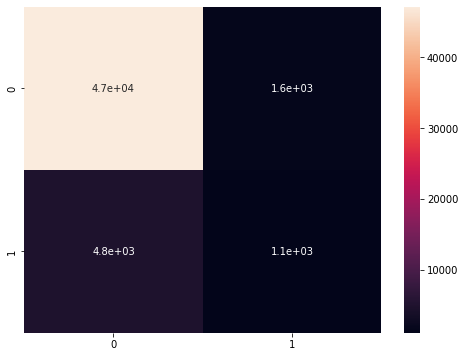

In [30]:
#Confusion Matrix for Naive bayes
import seaborn as sn
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(8,6))
ax.set_ylim([0,2])
arr=confusion_matrix(Y_test_r,nb_r.predict(X_test_r))

sn.heatmap(arr,annot=True)
plt.savefig("conmat_naive_bayes.png")

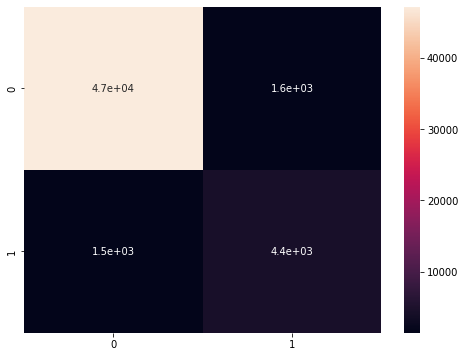

In [31]:
#decision tree confusion matrix
fig, ax = plt.subplots(figsize=(8,6))
ax.set_ylim([0,2])
arr=confusion_matrix(Y_test_r,dt_r.predict(X_test_r))

sn.heatmap(arr,annot=True)
plt.savefig("conmat_decision_tree.png")

In [32]:
data_nf = data[data["Is Fraud?"] == 0]
data_f = data[data["Is Fraud?"] == 1]

In [33]:
data_nf.head()

,User,Card,Year,Amount,Use Chip,MCC,Errors?,Card Brand,Card Type,Credit Limit,Year PIN last Changed,Current Age,Gender,Yearly Income - Person,Total Debt,FICO Score,Is Fraud?
0,780,3,2016,71.00,0,5499,0,2,1,39606,2008,54,1,53986,58381,748,0
1,580,1,2014,9.96,2,5411,0,3,0,11400,2009,67,0,34954,5942,729,0
2,1919,2,2009,66.26,2,5541,14,0,0,6100,2019,56,1,26510,53023,696,0
3,777,5,1998,75.00,2,5499,0,3,1,3134,2011,72,1,65055,1676,736,0
4,1227,3,2012,-72.00,2,5499,0,2,1,4130,2015,44,0,84365,113529,796,0


In [34]:
data_f.head()

,User,Card,Year,Amount,Use Chip,MCC,Errors?,Card Brand,Card Type,Credit Limit,Year PIN last Changed,Current Age,Gender,Yearly Income - Person,Total Debt,FICO Score,Is Fraud?
14,1294,1,2015,37.66,1,5814,0,3,1,31535,2009,68,1,41473,98151,724,1
29,124,2,2009,74.56,1,5311,0,2,1,13469,2009,45,0,25723,34007,746,1
37,1452,0,2010,121.95,2,4121,0,2,1,1129,2012,49,0,22583,62461,683,1
39,1085,0,2016,117.94,1,5977,0,2,1,18171,2014,47,1,46763,65106,696,1
40,161,2,2008,133.83,1,4829,0,3,1,52609,2010,48,1,82295,1555,736,1


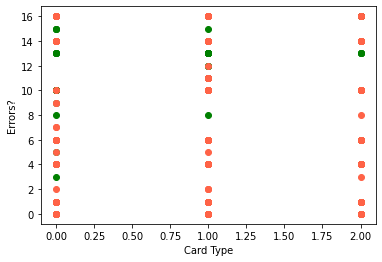

In [35]:
plt.scatter(data_nf["Card Type"],data_nf["Errors?"] ,color = "green")
plt.scatter(data_f["Card Type"],data_f["Errors?"] , color = "tomato")
plt.xlabel("Card Type")
plt.ylabel("Errors?")
plt.show()

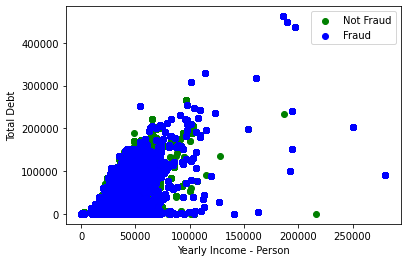

In [36]:
x1 = plt.scatter(data_nf["Yearly Income - Person"],data_nf["Total Debt"] ,color = "green")
x2 = plt.scatter(data_f["Yearly Income - Person"],data_f["Total Debt"] ,color = "blue")
plt.xlabel("Yearly Income - Person")
plt.ylabel("Total Debt")
plt.legend([x1,x2],['Not Fraud','Fraud'])
plt.savefig("incomeVdebt.jpg")
plt.show()

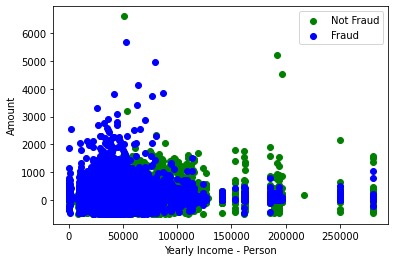

In [37]:
plt.scatter(data_nf["Yearly Income - Person"],data_nf["Amount"] ,color = "green")
plt.scatter(data_f["Yearly Income - Person"],data_f["Amount"] ,color = "blue")
plt.xlabel("Yearly Income - Person")
plt.ylabel("Amount")
plt.legend([x1,x2],['Not Fraud','Fraud'])
plt.savefig("incomeVamount.jpg")
plt.show()

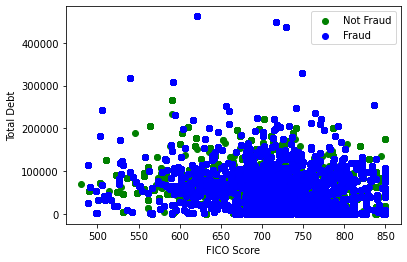

In [38]:
plt.scatter(data_nf["FICO Score"],data_nf["Total Debt"] ,color = "green")
plt.scatter(data_f["FICO Score"],data_f["Total Debt"] ,color = "blue")
plt.xlabel("FICO Score")
plt.ylabel("Total Debt")
plt.legend([x1,x2],['Not Fraud','Fraud'])
plt.savefig("ficoVdebt.jpg")
plt.show()

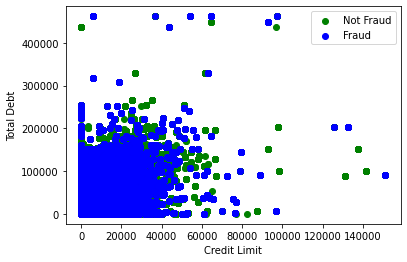

In [39]:
plt.scatter(data_nf["Credit Limit"],data_nf["Total Debt"] ,color = "green")
plt.scatter(data_f["Credit Limit"],data_f["Total Debt"] ,color = "blue")
plt.xlabel("Credit Limit")
plt.ylabel("Total Debt")
plt.legend([x1,x2],['Not Fraud','Fraud'])
plt.savefig("debtVcreditLimit.jpg")
plt.show()

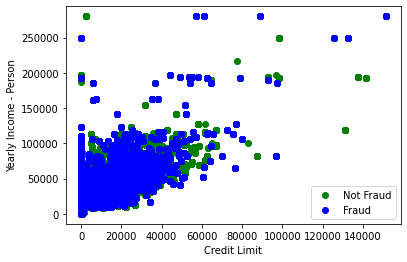

In [40]:
plt.scatter(data_nf["Credit Limit"],data_nf["Yearly Income - Person"] ,color = "green")
plt.scatter(data_f["Credit Limit"],data_f["Yearly Income - Person"] ,color = "blue")
plt.xlabel("Credit Limit")
plt.ylabel("Yearly Income - Person")
plt.legend([x1,x2],['Not Fraud','Fraud'])
plt.savefig("credit_limitVincome.jpg")
plt.show()

## Support Vector Machine

In [41]:
from sklearn.svm import SVC

### PCA 

In [42]:
#Separating Features
features = data.columns
features = features[0:len(features)-1]

In [43]:
#MIn-max scaling the data for PCA to work
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['Is Fraud?']].values
# Standardizing the features
x = MinMaxScaler().fit_transform(x)

In [44]:
from sklearn.decomposition import PCA

In [45]:
data.head()

,User,Card,Year,Amount,Use Chip,MCC,Errors?,Card Brand,Card Type,Credit Limit,Year PIN last Changed,Current Age,Gender,Yearly Income - Person,Total Debt,FICO Score,Is Fraud?
0,780,3,2016,71.00,0,5499,0,2,1,39606,2008,54,1,53986,58381,748,0
1,580,1,2014,9.96,2,5411,0,3,0,11400,2009,67,0,34954,5942,729,0
2,1919,2,2009,66.26,2,5541,14,0,0,6100,2019,56,1,26510,53023,696,0
3,777,5,1998,75.00,2,5499,0,3,1,3134,2011,72,1,65055,1676,736,0
4,1227,3,2012,-72.00,2,5499,0,2,1,4130,2015,44,0,84365,113529,796,0


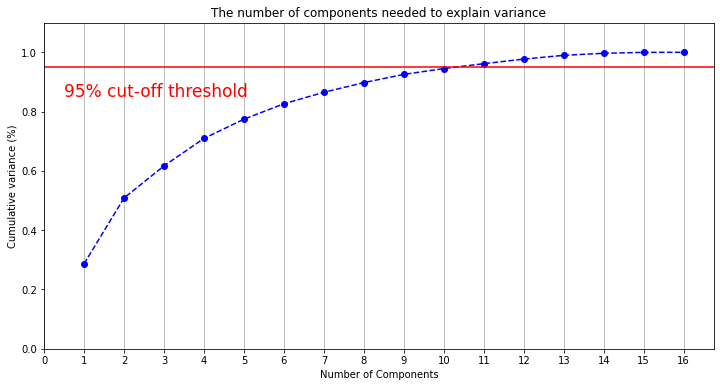

In [46]:
#Plotting cumulative variance withnumber of components to determine the number of features to reduce
pca = PCA().fit(x)

# % matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 17, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 17, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=17)

ax.grid(axis='x')
plt.savefig("PCA_ComponentAalyis.jpg")
plt.show()

In [47]:
# reducing the dimensions from 16->10
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [1,2,3,4,5,6,7,8,9,10])

In [48]:
principalDf.head()

,1,2,3,4,5,6,7,8,9,10
0,0.490005,0.687907,-0.056696,0.084829,-0.110653,0.209919,-0.115841,-0.205866,0.125780,0.010576
1,-0.466609,-0.330758,0.119156,0.235576,0.435223,0.072171,0.060138,-0.076163,-0.148679,-0.191948
2,0.502890,-0.316691,0.780895,-0.388346,-0.379940,0.029713,0.033631,0.452253,0.071703,0.066145
3,0.535350,-0.440132,-0.255150,0.051377,0.195321,0.473133,-0.037734,0.007445,0.212520,0.325441
4,-0.473717,-0.328033,-0.047813,-0.118030,-0.107616,0.004782,-0.335837,0.201950,0.145184,-0.020657


In [49]:
X = principalDf.to_numpy()

In [50]:
Y = data["Is Fraud?"].to_numpy()

In [51]:
X_train = X[0: int(0.8*X.shape[0]), :]
X_test = X[int(0.8*X.shape[0]):, :]
Y = Y.reshape(Y.shape[0], 1)
Y_train = Y[0:int(0.8*Y.shape[0]), :]
Y_test = Y[int(0.8*Y.shape[0]):, :]

In [126]:
#Using grid searh to find the best pramas
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']}
 
grid = GridSearchCV(SVC(), param_grid,refit = True , n_jobs=7)##Multithreading to makes things parallel

In [52]:
from sklearn.svm import SVC
model = SVC(C=1)
model.fit(X_train,Y_train.ravel())

SVC(C=1)

In [128]:
model.score(X_test,Y_test)

0.9022427102769546

In [129]:
Y_predicted = model.predict(X_test)

In [130]:
Y_tp = model.predict(X_train)

In [131]:
print("Accuracy Score For training - ")
print(accuracy_score(Y_train,Y_tp))

print()
print("Accuracy Score For testing - ")
print(accuracy_score(Y_test,Y_predicted))

print()
print("Precision Score For training - ")
print(precision_score(Y_train,Y_tp))

print()
print("Precision Score For testing - ")
print(precision_score(Y_test,Y_predicted))

print()
print(recall_score(Y_test,Y_predicted))
print(f1_score(Y_test,Y_predicted))

Accuracy Score For training - 
0.9018256487181129

Accuracy Score For testing - 
0.9022427102769546

Precision Score For training - 
0.6762759229298426

Precision Score For testing - 
0.6608084358523726

0.19141354148990328
0.2968421052631579


Confusion Matrix


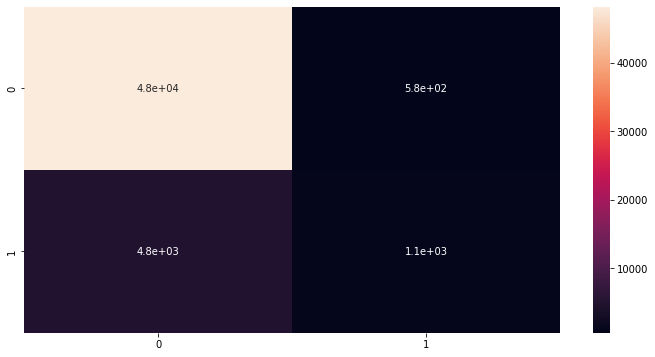

In [148]:
#SVM confusion matrix
import seaborn as sn
from sklearn import metrics
arr=metrics.confusion_matrix(Y_test,Y_predicted)
df_cm=pd.DataFrame(arr)
print("Confusion Matrix")
sn.heatmap(df_cm,annot=True)
plt.savefig("conmat_SVM.jpg")

In [53]:
import pickle

In [55]:
file = open("SVM_weight","wb")

In [56]:
pickle.dump(model,file)

In [57]:
file.close()